In [4]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# MPC import
from MPCVelControl_D3_3 import MPCVelControl
from PIControl.PIControl import PIControl
import numpy as np
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [6]:
Ts = 0.05
sim_time = 40.0
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 100])  # initial state
pos_target = np.array([0, 0, 10.0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
pos_controller = PIControl(pos_target)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, pos_control=pos_controller, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);

Not yet convgerged at iteration 1
Not yet convgerged at iteration 2
Not yet convgerged at iteration 3
Not yet convgerged at iteration 4
Not yet convgerged at iteration 5
Not yet convgerged at iteration 6
Not yet convgerged at iteration 7
Maximum invariant set found after 8 iterations !

Not yet convgerged at iteration 1
Not yet convgerged at iteration 2
Not yet convgerged at iteration 3
Not yet convgerged at iteration 4
Not yet convgerged at iteration 5
Not yet convgerged at iteration 6
Not yet convgerged at iteration 7
Maximum invariant set found after 8 iterations !

Maximum invariant set found after 1 iterations !

Not yet convgerged at iteration 1
Not yet convgerged at iteration 2
Not yet convgerged at iteration 3
Not yet convgerged at iteration 4
Not yet convgerged at iteration 5
Not yet convgerged at iteration 6
Not yet convgerged at iteration 7
Not yet convgerged at iteration 8
Not yet convgerged at iteration 9
Not yet convgerged at iteration 10
Not yet convgerged at iteration 1

/Users/mt/opt/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


RuntimeError: QP problem failed: user_limit

NameError: name 't_cl' is not defined

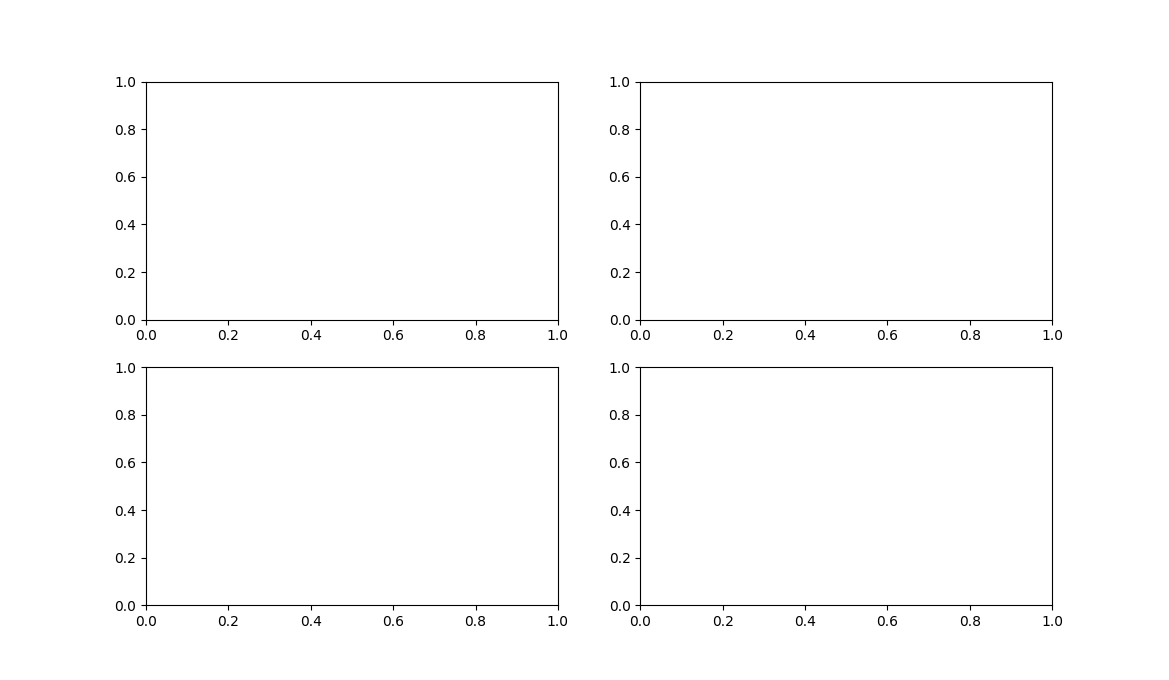

In [4]:
import matplotlib.pyplot as plt

x0 = np.array([
    0, 0, 0,   # angular rates
    0, 0, 0,   # angles
    0, 0, 0,   # velocities
    50, 50, 100  # positions
])

pos_target = np.array([0.0, 0.0, 10.0])

fig, axs = plt.subplots(2, 2, figsize=(11.69, 6.8))

# --- Position ---
axs[0, 0].plot(t_cl, x_cl[9, :], label=r"$x$")
axs[0, 0].plot(t_cl, x_cl[10, :], label=r"$y$")
axs[0, 0].plot(t_cl, x_cl[11, :], label=r"$z$")
axs[0, 0].axhline(0, linestyle="--", linewidth=0.8)
axs[0, 0].axhline(10, linestyle="--", linewidth=0.8)
axs[0, 0].set_title("Position")
axs[0, 0].set_ylabel("[m]")
axs[0, 0].legend()
axs[0, 0].grid()

# --- Velocity ---
axs[0, 1].plot(t_cl, x_cl[6, :], label=r"$v_x$")
axs[0, 1].plot(t_cl, x_cl[7, :], label=r"$v_y$")
axs[0, 1].plot(t_cl, x_cl[8, :], label=r"$v_z$")
axs[0, 1].axhline(0, linestyle="--", linewidth=0.8)
axs[0, 1].set_title("Velocity")
axs[0, 1].set_ylabel("[m/s]")
axs[0, 1].legend()
axs[0, 1].grid()

# --- Roll ---
axs[1, 0].plot(t_cl, np.rad2deg(x_cl[5, :]))
axs[1, 0].axhline(0, linestyle="--", linewidth=0.8)
axs[1, 0].set_title("Roll angle")
axs[1, 0].set_ylabel("[deg]")
axs[1, 0].grid()

# --- Inputs ---
axs[1, 1].plot(t_cl[:-1], u_cl.T)
axs[1, 1].set_title("Control inputs")
axs[1, 1].set_ylabel("[-]")
axs[1, 1].grid()

plt.tight_layout()
plt.show()
